<a href="https://colab.research.google.com/github/ryanroshandy55/UTS-Machine_Learning-2023-2024/blob/main/UTS_no3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# No 3 Classification

In [209]:
# Importing libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

#Import model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


#Import Accuracy Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Import Confusion Matrix
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'f', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Method 1 SVM

In [182]:
# call and read data
# using a data have been cleaned
url = "https://raw.githubusercontent.com/ryanroshandy55/UTS-Machine_Learning-2023-2024/main/Clean%20Data/clean_mobileprice.csv"
clean_data = pd.read_csv(url, index_col=0)
clean_data = clean_data.dropna(how='all', axis='columns')
clean_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7.0,0.6,188.0,2,...,20,756,2146.5,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53.0,0.7,136.0,3,...,905,1988,2631.0,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41.0,0.9,145.0,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10.0,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44.0,0.6,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1,0.5,1,0,1,2.0,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1996,1965.0,1,2.6,1,0,0,39.0,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1997,1911.0,0,0.9,1,1,1,36.0,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
1998,1512.0,0,0.9,0,4,1,46.0,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [183]:
clean_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [184]:
# Split data into x and y
X = clean_data.drop(columns=['price_range'])
X.head()

Y = clean_data['price_range'].values

In [185]:
# Melakukan stadarisasi data agar data konsisten
minmax = MinMaxScaler(feature_range=(0, 1))
print(minmax.fit(X))
X = minmax.transform(X)
X

MinMaxScaler()


array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [187]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

In [188]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
ply = svm.SVC(kernel='poly')
rbf = svm.SVC(kernel='rbf')
sgm = svm.SVC(kernel='sigmoid')
#Train the model using the training sets
clf.fit(X_train, Y_train)
ply.fit(X_train, Y_train)
rbf.fit(X_train, Y_train)
sgm.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [189]:
y_pred

array([0, 2, 2, 0, 3, 1, 3, 3, 2, 0, 1, 1, 1, 3, 2, 3, 0, 3, 3, 1, 3, 2,
       2, 2, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 0, 2, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 1, 3, 1, 2, 1, 0, 2, 1, 1, 3, 0, 0, 1, 0, 1, 1, 3, 2, 0, 2, 0,
       3, 1, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 1, 1, 3, 1, 0, 3, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 3, 2, 1, 3, 2, 0, 1, 1, 0, 3, 3, 1, 3, 2, 1, 0, 2,
       3, 1, 3, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 3, 1, 2, 2, 3, 2, 3, 0, 0,
       1, 0, 2, 0, 3, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 2, 0, 3, 3, 0,
       0, 0, 0, 1, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 3, 0, 2, 0, 0,
       1, 3, 1, 0, 1, 0, 3, 0, 0, 2, 0, 2, 0, 2, 3, 2, 2, 2, 1, 0, 3, 0,
       1, 0, 0, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 0, 2, 2, 0, 3, 3, 2, 2, 2,
       2, 3, 2, 1, 2, 0, 2, 3, 3, 0, 0, 3, 3, 3, 1, 2, 0, 2, 1, 2, 1, 3,
       0, 2, 0, 3, 2, 3, 3, 2, 0, 0, 3, 2, 0, 1, 2, 3, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 0, 2, 3, 1, 0, 3, 3, 0, 0, 0, 2, 2, 2, 3, 2, 0, 3, 3, 1,
       0, 3, 1, 2, 0, 3, 0, 2, 3, 1, 2, 2, 1, 2, 1,

In [190]:
Y_test

array([0, 2, 2, 1, 2, 1, 3, 3, 2, 0, 1, 0, 1, 3, 2, 3, 0, 3, 3, 1, 3, 2,
       2, 2, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 0, 2, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 1, 3, 1, 2, 1, 0, 2, 1, 1, 3, 0, 0, 2, 0, 1, 1, 3, 2, 0, 2, 0,
       3, 1, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 1, 1, 3, 1, 0, 3, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 1, 1, 0, 3, 3, 1, 3, 2, 1, 0, 2,
       2, 1, 3, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 3, 1, 2, 2, 3, 2, 3, 0, 0,
       1, 0, 2, 0, 3, 1, 2, 3, 3, 2, 1, 0, 1, 1, 2, 3, 3, 2, 0, 3, 3, 0,
       1, 0, 0, 1, 2, 2, 1, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 3, 0, 2, 0, 0,
       1, 3, 1, 0, 1, 0, 3, 0, 0, 2, 0, 2, 0, 2, 3, 2, 2, 2, 1, 0, 3, 0,
       1, 0, 0, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 0, 2, 2, 0, 3, 3, 2, 2, 2,
       2, 3, 2, 1, 2, 0, 2, 3, 3, 0, 0, 2, 3, 3, 1, 2, 0, 2, 1, 2, 1, 3,
       0, 2, 0, 3, 2, 3, 3, 2, 0, 0, 3, 2, 0, 1, 2, 3, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 0, 2, 3, 1, 0, 3, 3, 0, 0, 0, 2, 2, 2, 3, 2, 0, 3, 3, 1,
       0, 3, 1, 2, 1, 3, 0, 1, 3, 1, 2, 2, 1, 2, 1,

In [191]:
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.95


In [192]:
#confusion matrix
y_true = Y_test
cm = confusion_matrix(y_pred, y_true)

Text(8.222222222222223, 0.5, 'y_true')

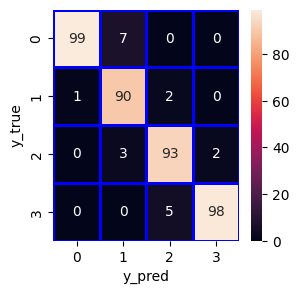

In [193]:
import seaborn as sns
f, ax= plt.subplots(figsize = (3,3))

sns.heatmap(cm, annot = True, linewidths= 1, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")

In [194]:
# predict with kernel = sigmoid svm
y_pred_sgm = sgm.predict(X_test)

In [195]:
print("Accuracy:",accuracy_score(Y_test, y_pred_sgm))
y_pred_sgm

Accuracy: 0.2125


array([3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 0, 1, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0,
       0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0,
       2, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3,
       0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 1, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3, 0,
       3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 2, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3,
       0, 3, 2, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3,

Text(8.222222222222223, 0.5, 'y_true')

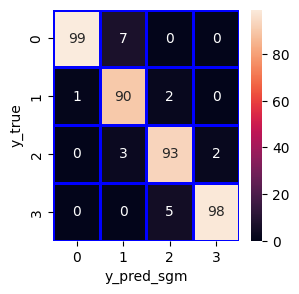

In [196]:
f, ax= plt.subplots(figsize = (3,3))

sns.heatmap(cm, annot = True, linewidths= 1, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel("y_pred_sgm")
plt.ylabel("y_true")

# Method 2 KNN

In [197]:
# call and read data
# using a data have been cleaned
url = "https://raw.githubusercontent.com/ryanroshandy55/UTS-Machine_Learning-2023-2024/main/Clean%20Data/clean_mobileprice.csv"
knn_clean_data = pd.read_csv(url, index_col=0)
knn_clean_data = clean_data.dropna(how='all', axis='columns')
knn_clean_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7.0,0.6,188.0,2,...,20,756,2146.5,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53.0,0.7,136.0,3,...,905,1988,2631.0,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41.0,0.9,145.0,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10.0,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44.0,0.6,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1,0.5,1,0,1,2.0,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1996,1965.0,1,2.6,1,0,0,39.0,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1997,1911.0,0,0.9,1,1,1,36.0,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
1998,1512.0,0,0.9,0,4,1,46.0,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [200]:
# Split data into x and y
x = clean_data.drop(columns=['price_range'])
x.head()

y = clean_data['price_range'].values

In [201]:
# Melakukan stadarisasi data agar data konsisten
minmax = MinMaxScaler(feature_range=(0, 1))
print(minmax.fit(x))
x = minmax.transform(x)
x

MinMaxScaler()


array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [203]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [204]:
knn_pred = knn.predict(x_test)
knn_pred

array([0, 2, 1, 2, 3, 2, 1, 3, 3, 1, 0, 0, 3, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       0, 1, 0, 3, 1, 1, 0, 2, 2, 3, 3, 1, 1, 0, 0, 3, 3, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 3, 1, 3, 1, 0, 3, 1, 3, 2, 1, 3, 0,
       3, 0, 0, 2, 0, 0, 1, 2, 3, 0, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 3, 2, 1, 1, 1, 0, 3, 3, 2, 3, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 0, 0, 2, 2, 2, 1, 3, 2, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 3, 3, 0, 3, 0, 0, 2, 1, 1, 3, 1, 1, 1, 3, 2, 0,
       0, 1, 0, 1, 0, 3, 0, 3, 2, 1, 1, 3, 2, 2, 1, 0, 0, 3, 2, 2, 0, 1,
       1, 2, 0, 0, 2, 0, 3, 1, 0, 3, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1,
       1, 2, 0, 0, 0, 2, 3, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 3, 3, 3, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 3, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 2, 1, 3, 1, 1, 0, 0, 1, 3, 0, 1, 3, 2, 2, 1, 2, 0, 3, 1,
       0, 1, 3, 1, 2, 0, 1, 0, 3, 3, 2, 0, 0, 2, 1, 3, 3, 3, 0, 1, 2, 2,
       0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 2, 2, 0, 1, 0,

In [205]:
knn_test = y_test
knn_test

array([0, 2, 2, 1, 2, 1, 3, 3, 2, 0, 1, 0, 1, 3, 2, 3, 0, 3, 3, 1, 3, 2,
       2, 2, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 0, 2, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 1, 3, 1, 2, 1, 0, 2, 1, 1, 3, 0, 0, 2, 0, 1, 1, 3, 2, 0, 2, 0,
       3, 1, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 1, 1, 3, 1, 0, 3, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 1, 1, 0, 3, 3, 1, 3, 2, 1, 0, 2,
       2, 1, 3, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 3, 1, 2, 2, 3, 2, 3, 0, 0,
       1, 0, 2, 0, 3, 1, 2, 3, 3, 2, 1, 0, 1, 1, 2, 3, 3, 2, 0, 3, 3, 0,
       1, 0, 0, 1, 2, 2, 1, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 3, 0, 2, 0, 0,
       1, 3, 1, 0, 1, 0, 3, 0, 0, 2, 0, 2, 0, 2, 3, 2, 2, 2, 1, 0, 3, 0,
       1, 0, 0, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 0, 2, 2, 0, 3, 3, 2, 2, 2,
       2, 3, 2, 1, 2, 0, 2, 3, 3, 0, 0, 2, 3, 3, 1, 2, 0, 2, 1, 2, 1, 3,
       0, 2, 0, 3, 2, 3, 3, 2, 0, 0, 3, 2, 0, 1, 2, 3, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 0, 2, 3, 1, 0, 3, 3, 0, 0, 0, 2, 2, 2, 3, 2, 0, 3, 3, 1,
       0, 3, 1, 2, 1, 3, 0, 1, 3, 1, 2, 2, 1, 2, 1,

In [206]:
print("Accuracy:",accuracy_score(knn_test, knn_pred))

Accuracy: 0.385


In [241]:
#confusion matrix
knn_true = knn_test
cm = confusion_matrix(knn_pred, knn_true)

Text(8.222222222222223, 0.5, 'knn_true')

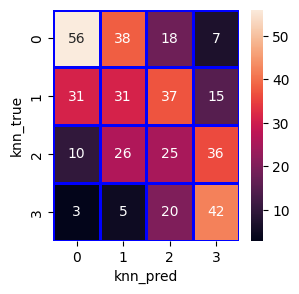

In [243]:
f, ax= plt.subplots(figsize = (3,3))

sns.heatmap(cm, annot = True, linewidths= 1, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel("knn_pred")
plt.ylabel("knn_true")

# Decision Tree Models

In [208]:
# call and read data
# using a data have been cleaned
url = "https://raw.githubusercontent.com/ryanroshandy55/UTS-Machine_Learning-2023-2024/main/Clean%20Data/clean_mobileprice.csv"
dtm_clean_data = pd.read_csv(url, index_col=0)
dtm_clean_data = clean_data.dropna(how='all', axis='columns')
dtm_clean_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7.0,0.6,188.0,2,...,20,756,2146.5,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53.0,0.7,136.0,3,...,905,1988,2631.0,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41.0,0.9,145.0,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10.0,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44.0,0.6,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1,0.5,1,0,1,2.0,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1996,1965.0,1,2.6,1,0,0,39.0,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1997,1911.0,0,0.9,1,1,1,36.0,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
1998,1512.0,0,0.9,0,4,1,46.0,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [210]:
# Split data into x and y
a = clean_data.drop(columns=['price_range'])
a.head()

b = clean_data['price_range'].values

In [231]:
minmax = MinMaxScaler(feature_range=(0, 1))
print(minmax.fit(a))
a = minmax.transform(a)
a

MinMaxScaler()


array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [232]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [233]:
dtm = tree.DecisionTreeClassifier()
dtm = dtm.fit(a_train, b_train)

In [234]:
a_pred = dtm.predict(a_test)

In [235]:
a_pred

array([3, 0, 2, 2, 3, 0, 1, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 0, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 0, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 2, 0, 0, 0, 1, 1,
       2, 3, 1, 2, 2, 1, 0, 2, 3, 3, 0, 3, 2, 1, 3, 1, 3, 2, 3, 2, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 0, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 3, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 0, 0, 3, 2, 2, 3, 3, 0,
       2, 1, 3, 0, 3, 0, 0, 1, 3, 1, 1, 0, 2, 3, 0, 1, 1, 3, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 1, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 3, 3, 0, 2, 0, 1,

In [236]:
b_test

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [247]:
print("Accuracy:",accuracy_score(b_test, a_pred))

Accuracy: 0.825


In [244]:
#confusion matrix
dtm_true = b_test
cm = confusion_matrix(a_pred, dtm_true)

Text(8.222222222222223, 0.5, 'dtm_test')

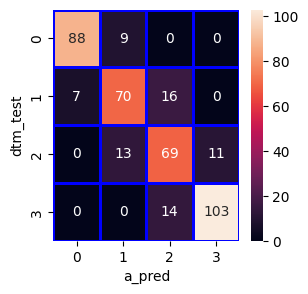

In [246]:
f, ax= plt.subplots(figsize = (3,3))

sns.heatmap(cm, annot = True, linewidths= 1, linecolor='blue', fmt='.0f', ax=ax)
plt.xlabel("a_pred")
plt.ylabel("dtm_test")